In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
cell_features_df = pd.read_csv('cell_types_specimen_details.csv')

In [28]:
cell_features_df.head()
cell_features_df.set_index('specimen__id')

humancell_df = cell_features_df[cell_features_df['donor__species']=='Homo Sapiens']
epihumancell_df = humancell_df[humancell_df['donor__disease_state']== 'epilepsy']
epihumancell_df.head()
epihumancell_df.columns
epihumanL4_df = epihumancell_df[epihumancell_df['structure__layer']=='4']
epihumanL5_df = epihumancell_df[epihumancell_df['structure__layer']=='5']



In [29]:
epihumancell_df.columns

Index(['line_name', 'specimen__id', 'specimen__name', 'specimen__hemisphere',
       'structure__id', 'structure__name', 'structure__acronym',
       'structure_parent__id', 'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'nr__reconstruction_type',
       'nrwkf__id', 'erwkf__id', 'ef__fast_trough_v_long_square',
       'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation',
       'ef__f_i_curve_slope', 'ef__threshold_i_long_square', 'ef__tau',
       'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp',
       'ef__vrest', 'si__height', 'si__width', 'si__path', 'csl__x', 'csl__y',
       'csl__z', 'csl__normalized_depth', 'cell_reporter_status', 'm__glif',
       'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
       'tag__apical', 'tag__dendrite_type', 'morph_thumb_path',
       'ephys_

In [43]:
features = list(epihumancell_df.columns)
columns_to_compare = []
for i in features:
    if epihumancell_df[i].dtypes != object:
        columns_to_compare.append(i)     

columns_to_compare.remove('specimen__id') 
columns_to_compare.remove('structure__id')
columns_to_compare.remove('structure_parent__id')

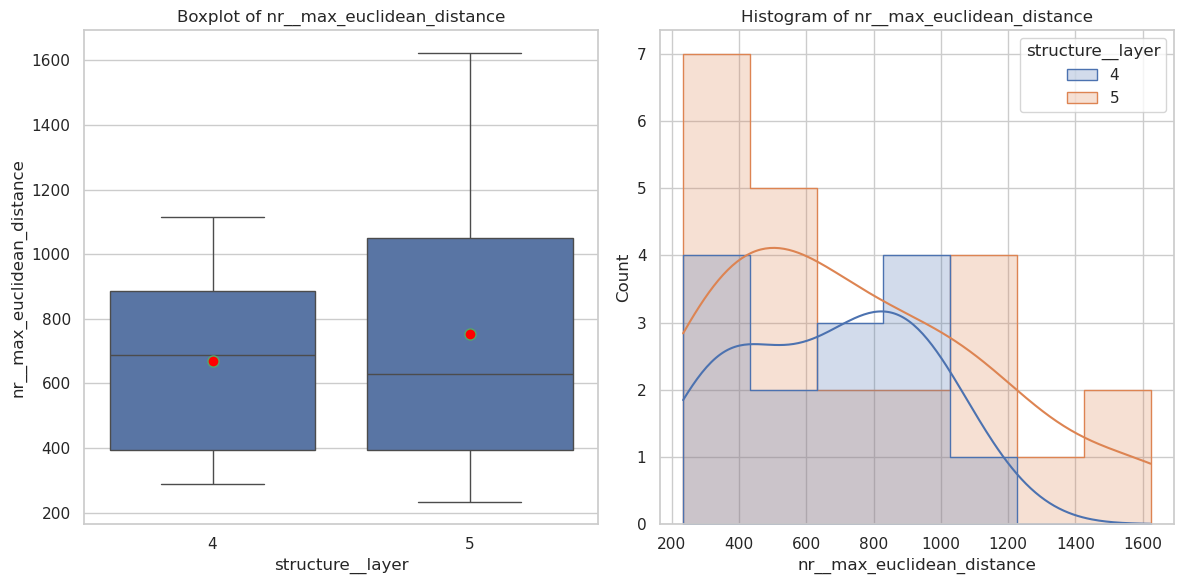

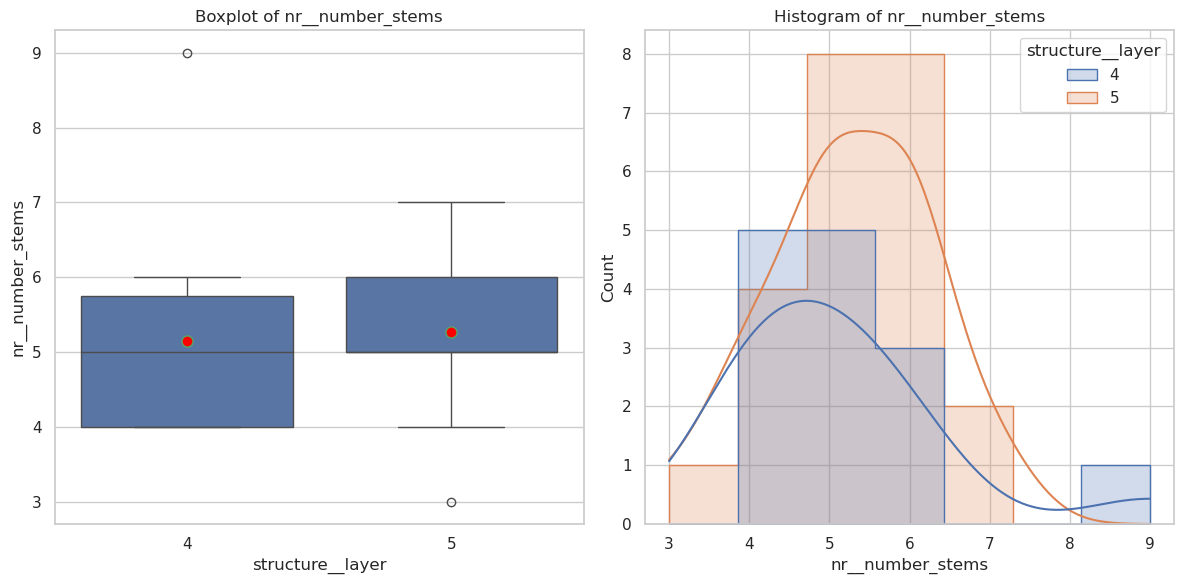

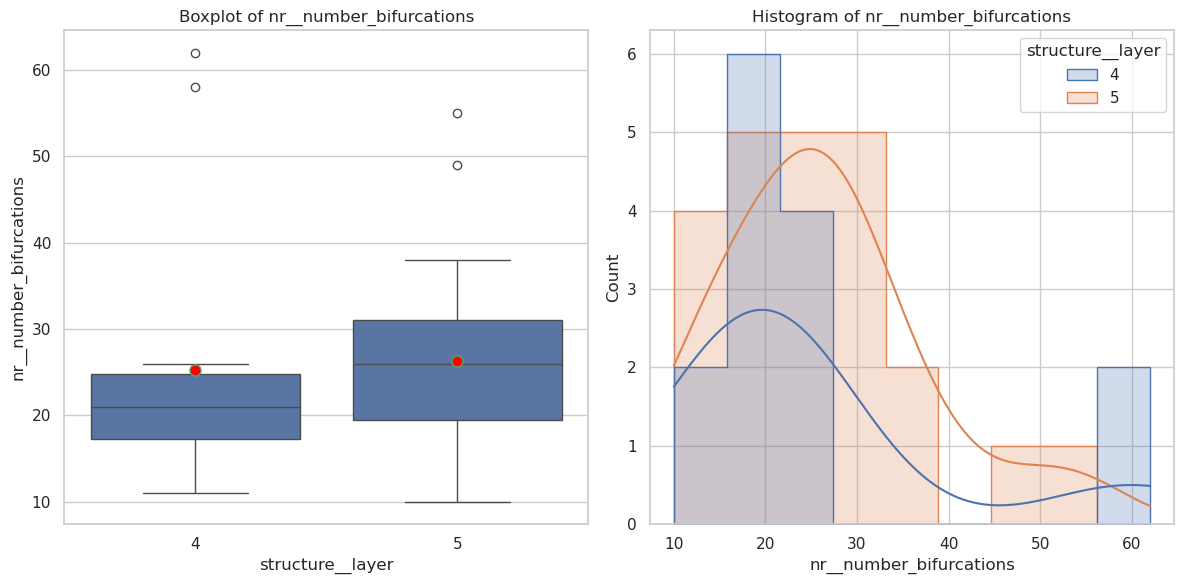

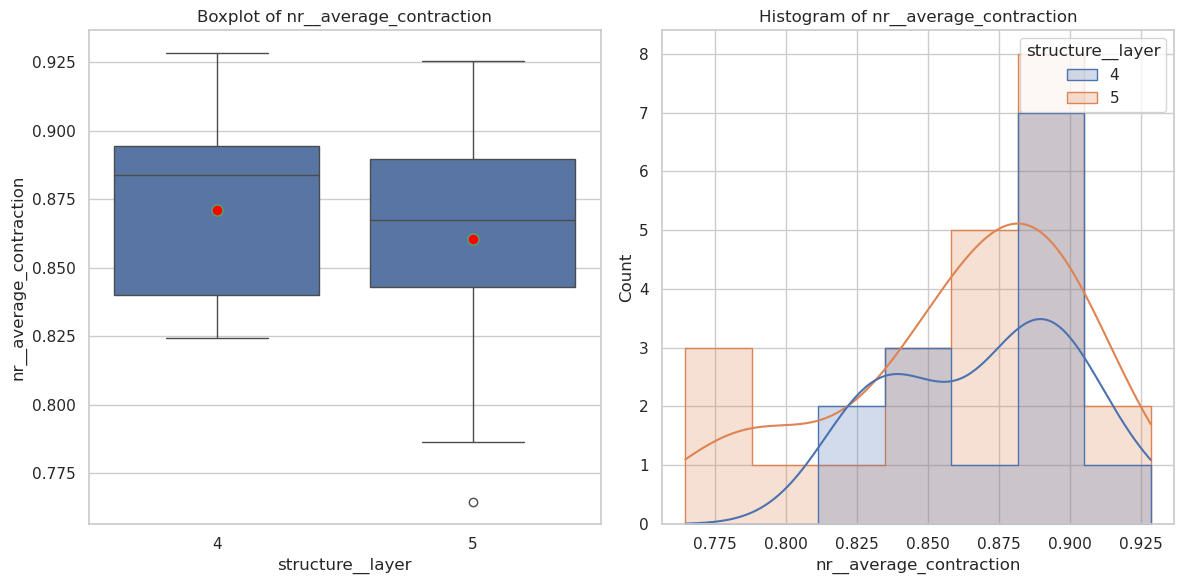

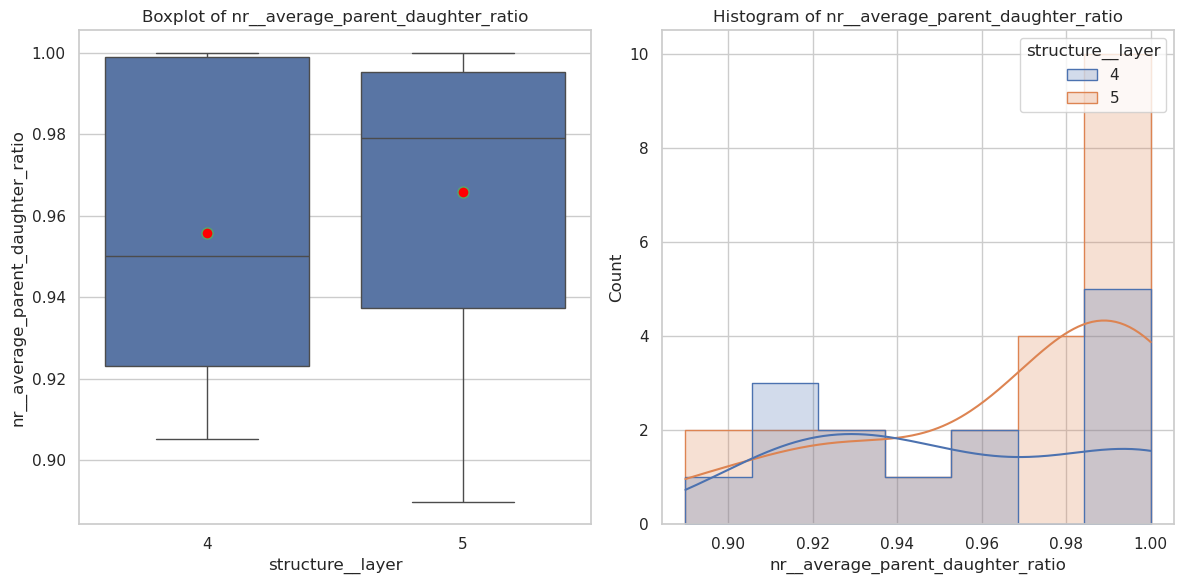

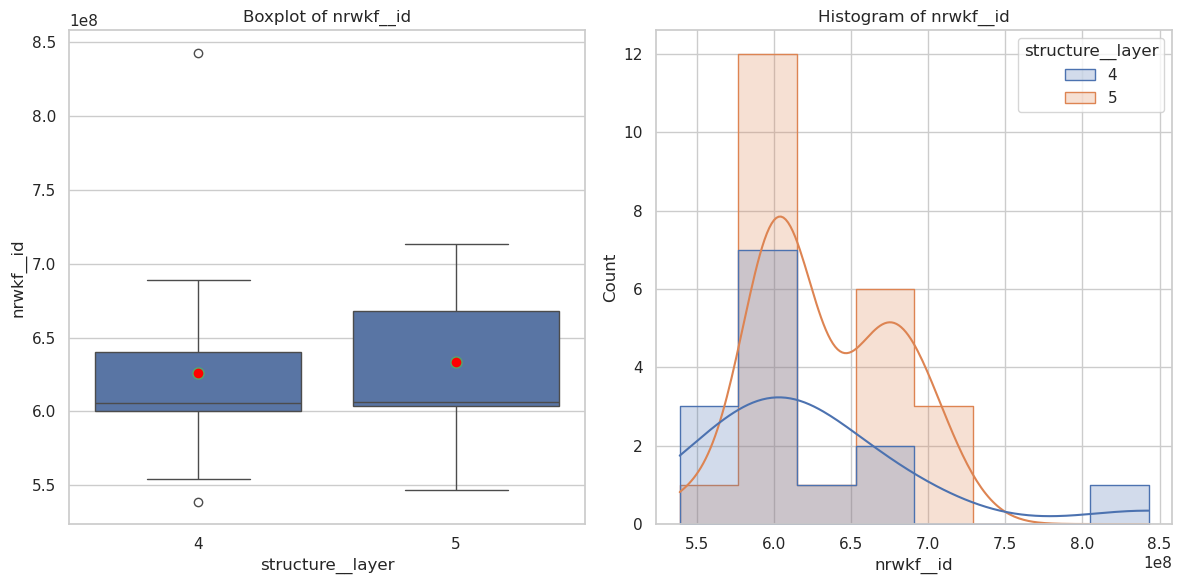

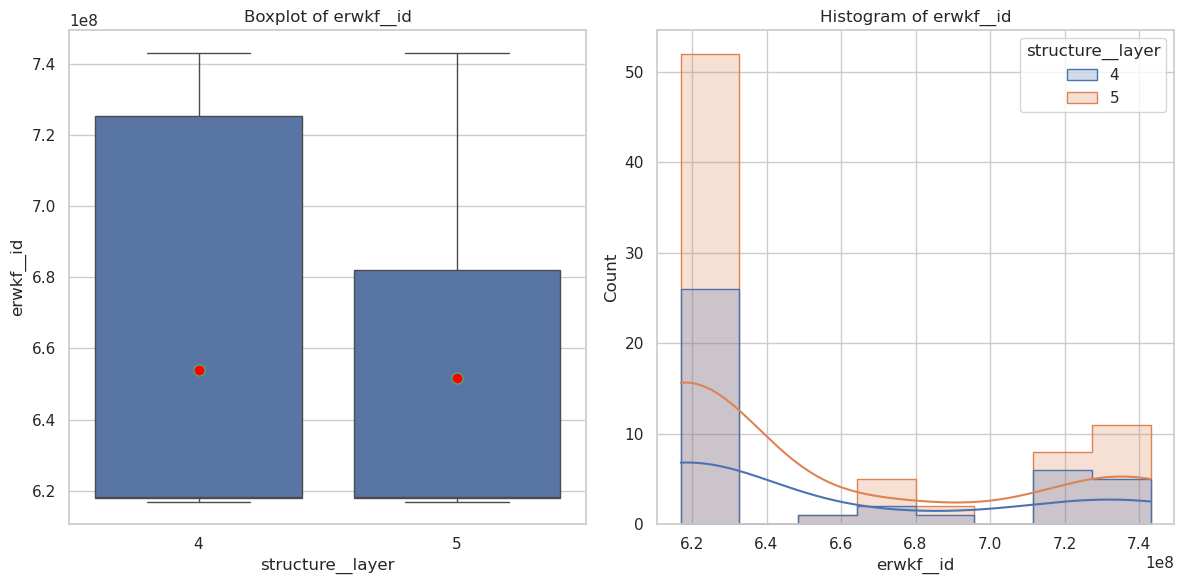

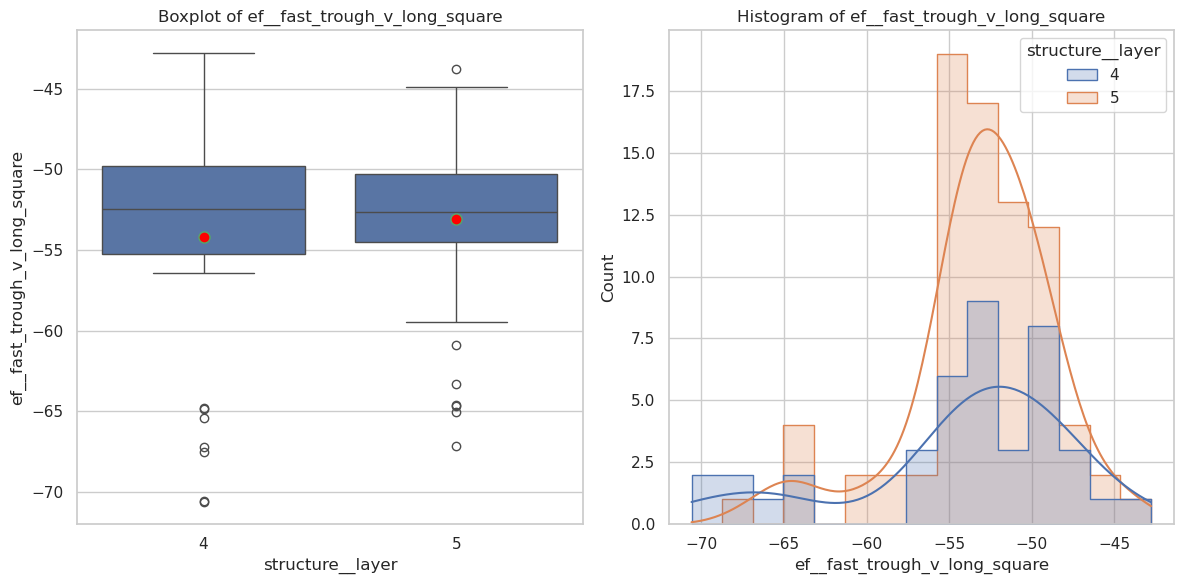

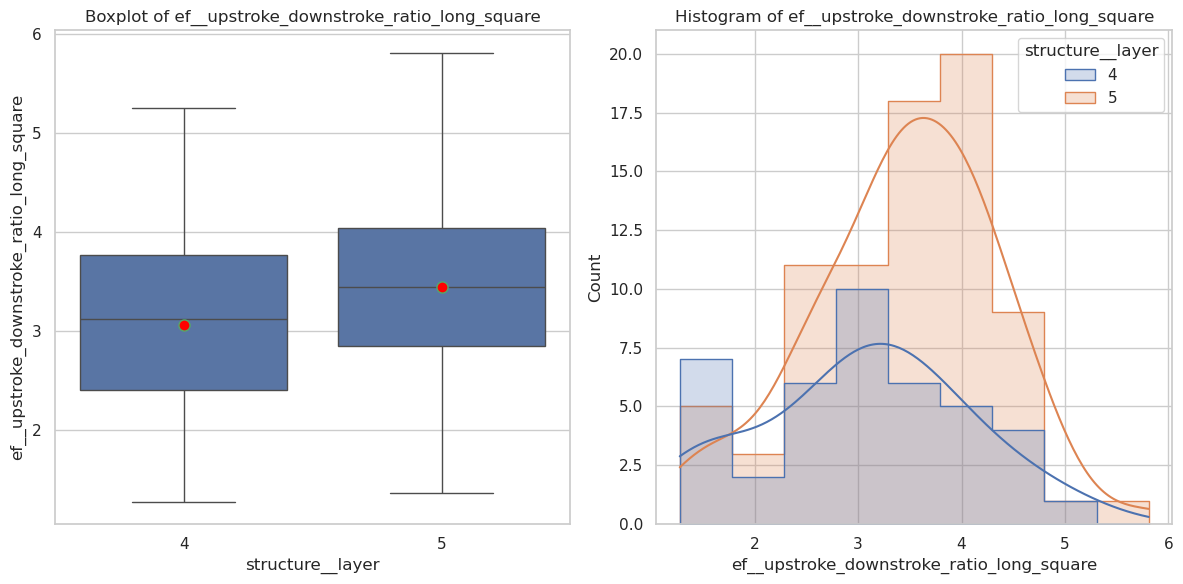

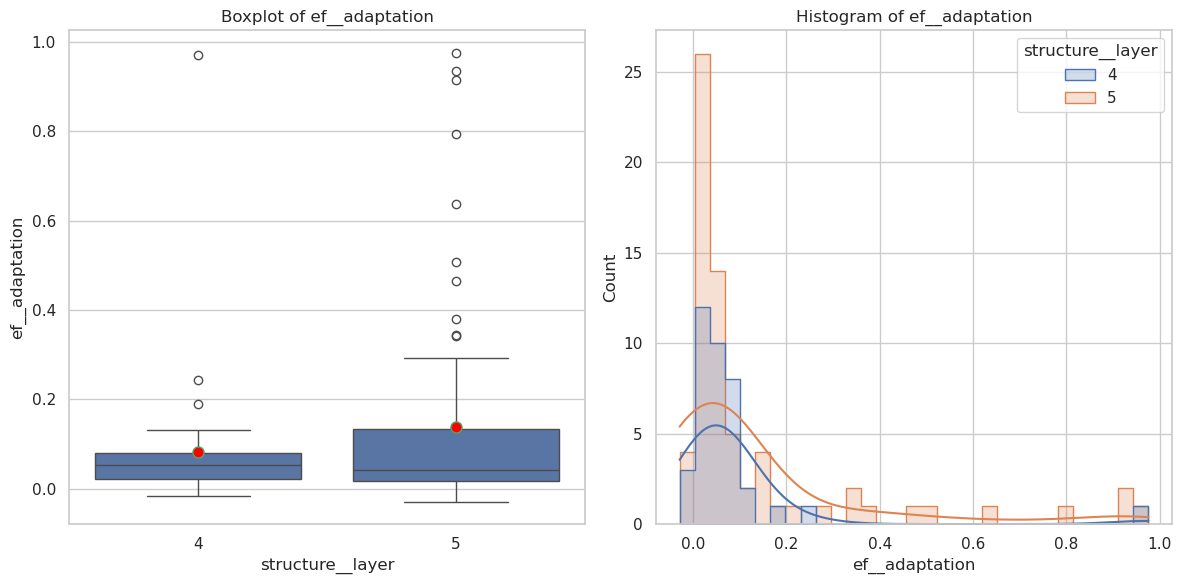

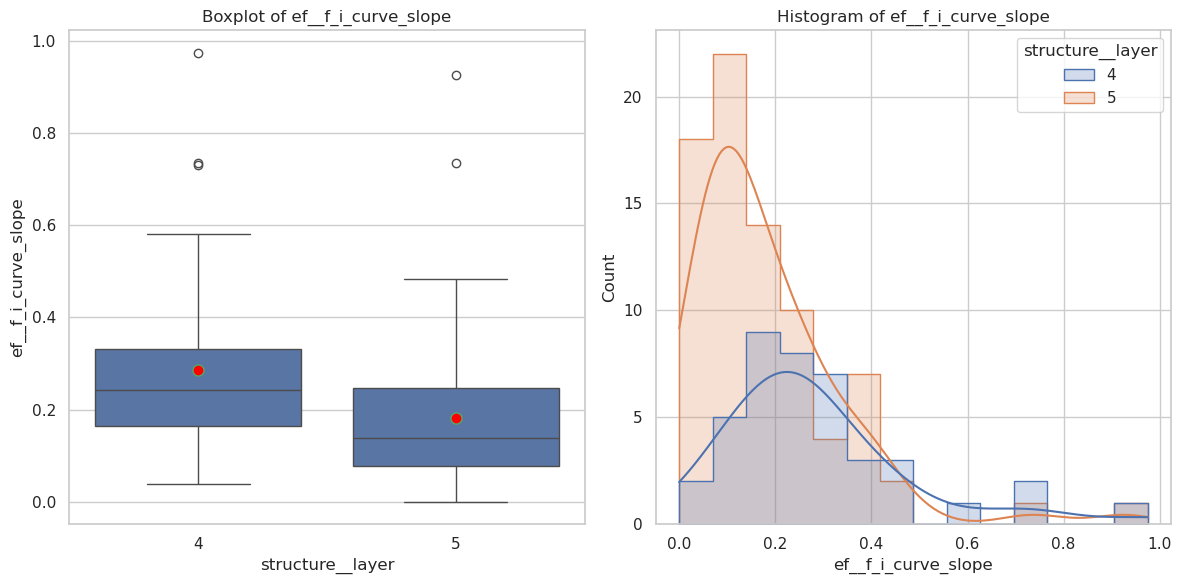

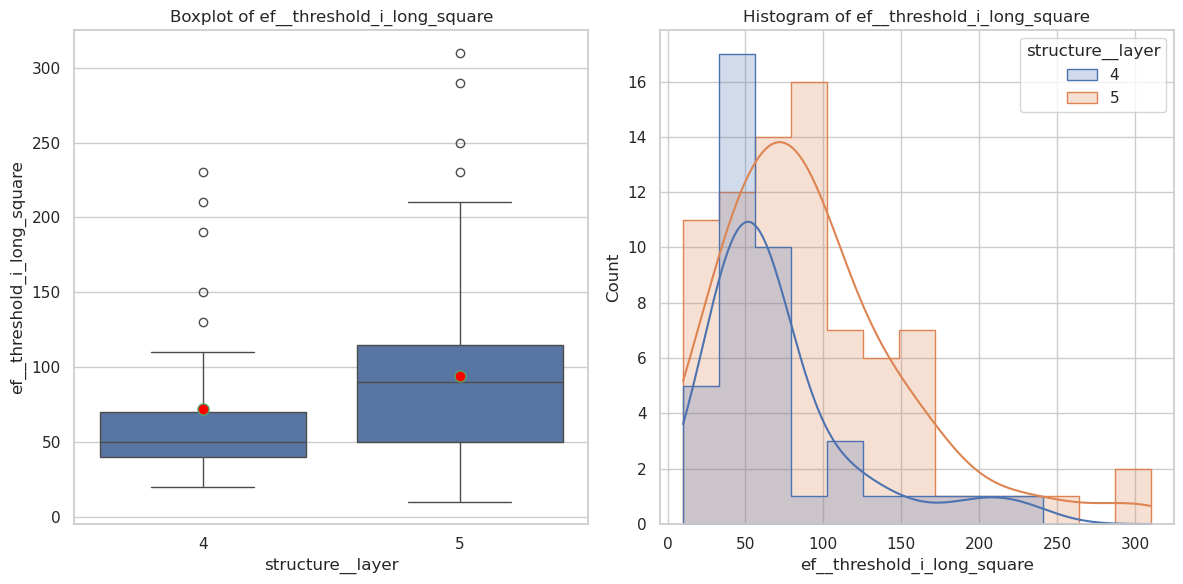

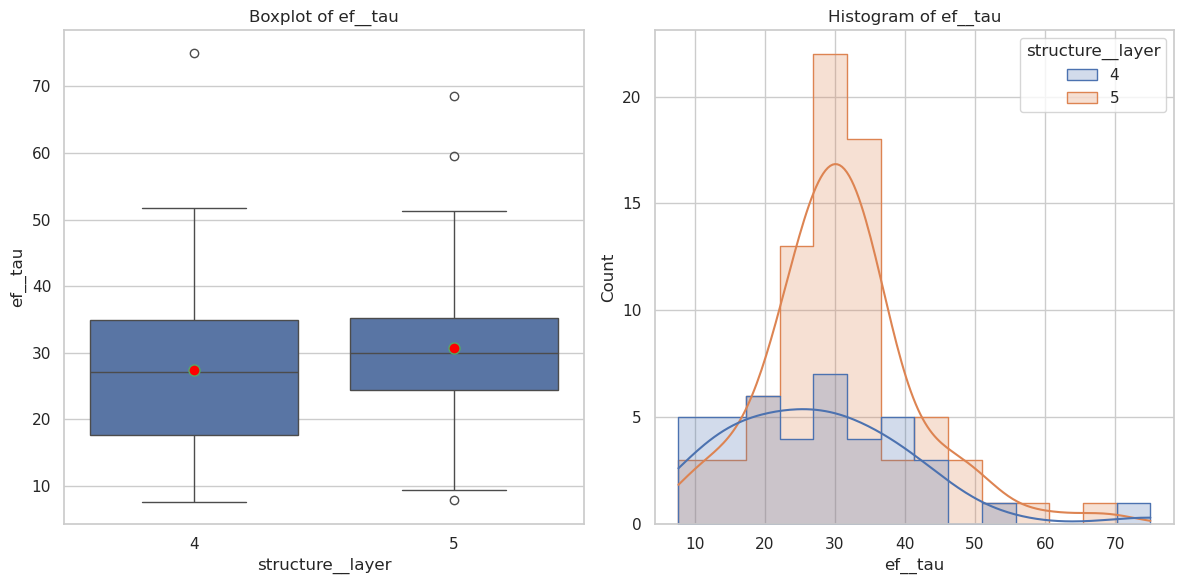

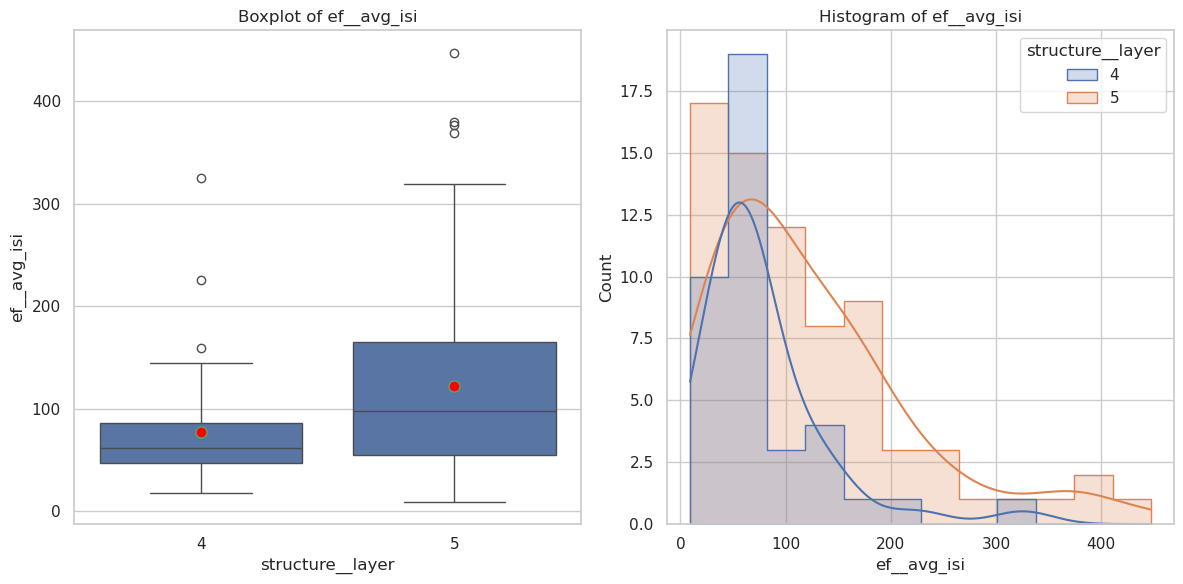

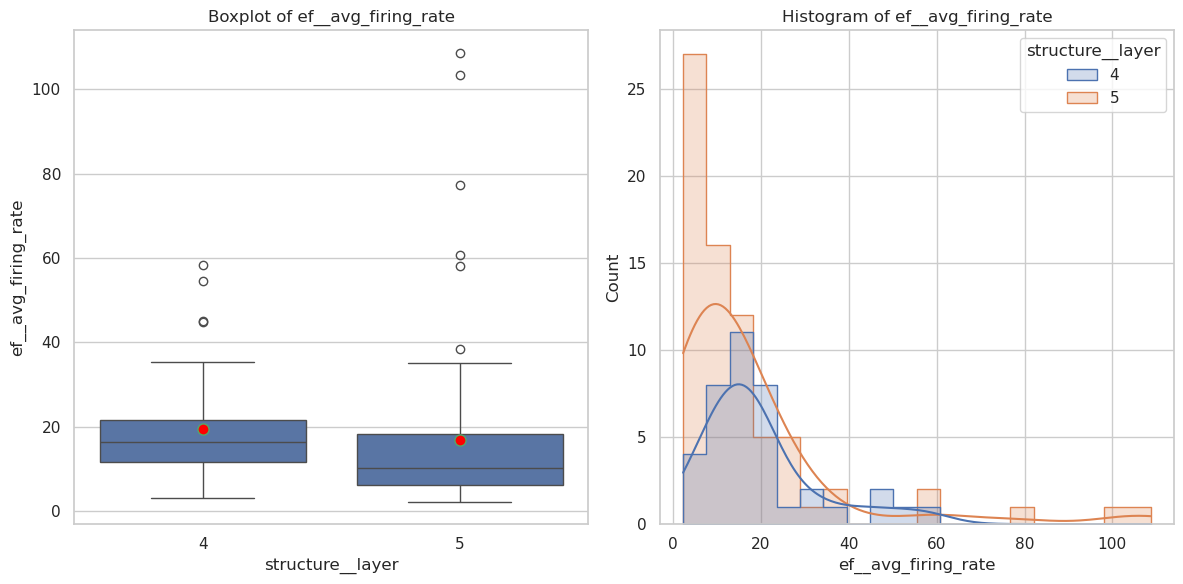

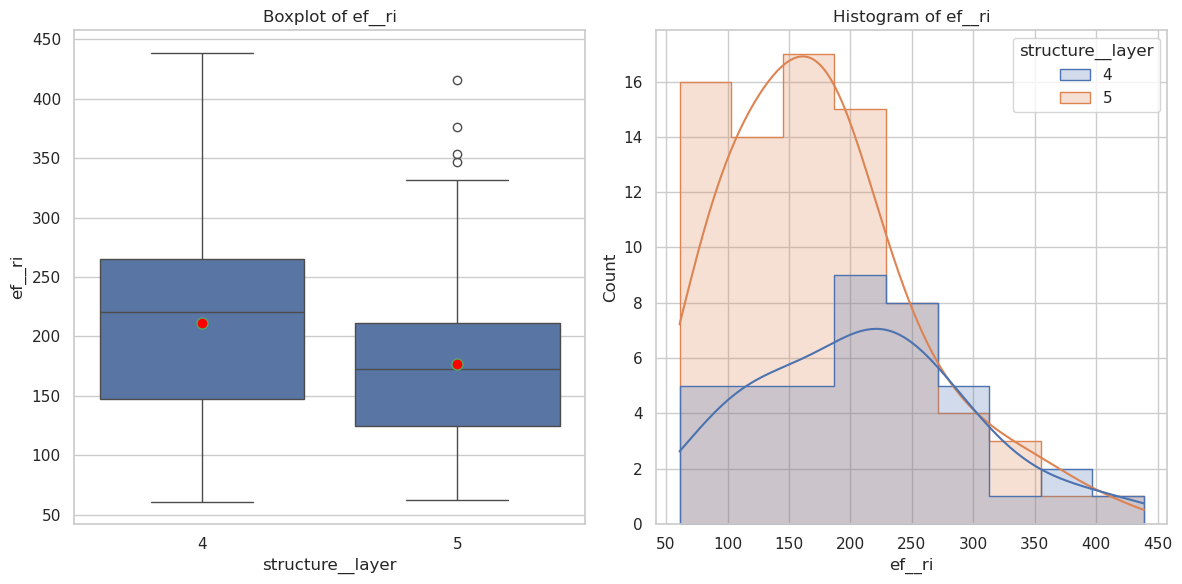

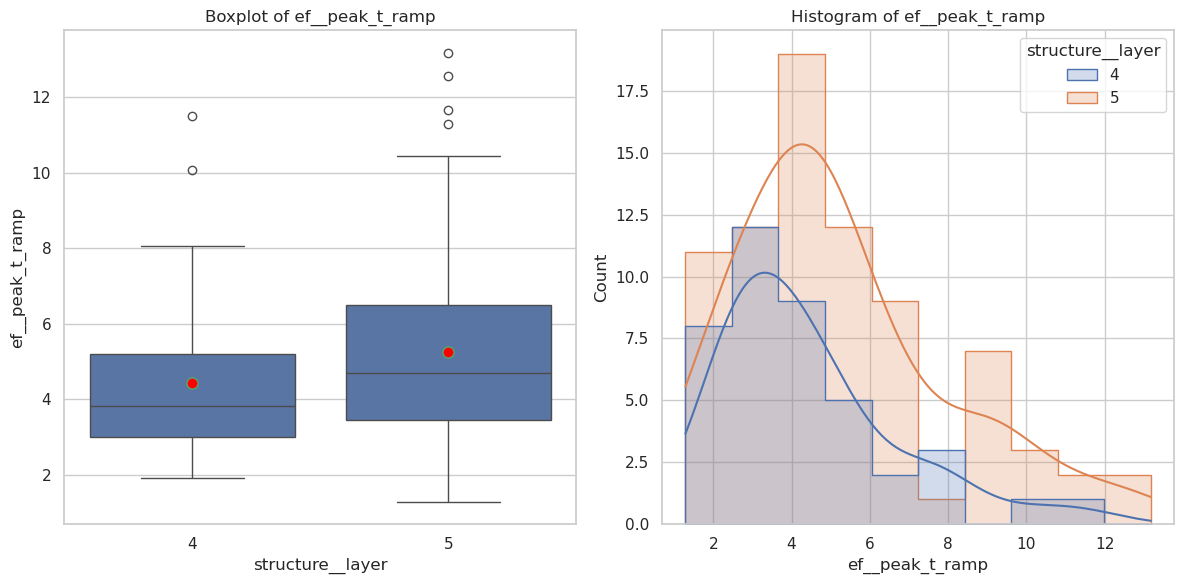

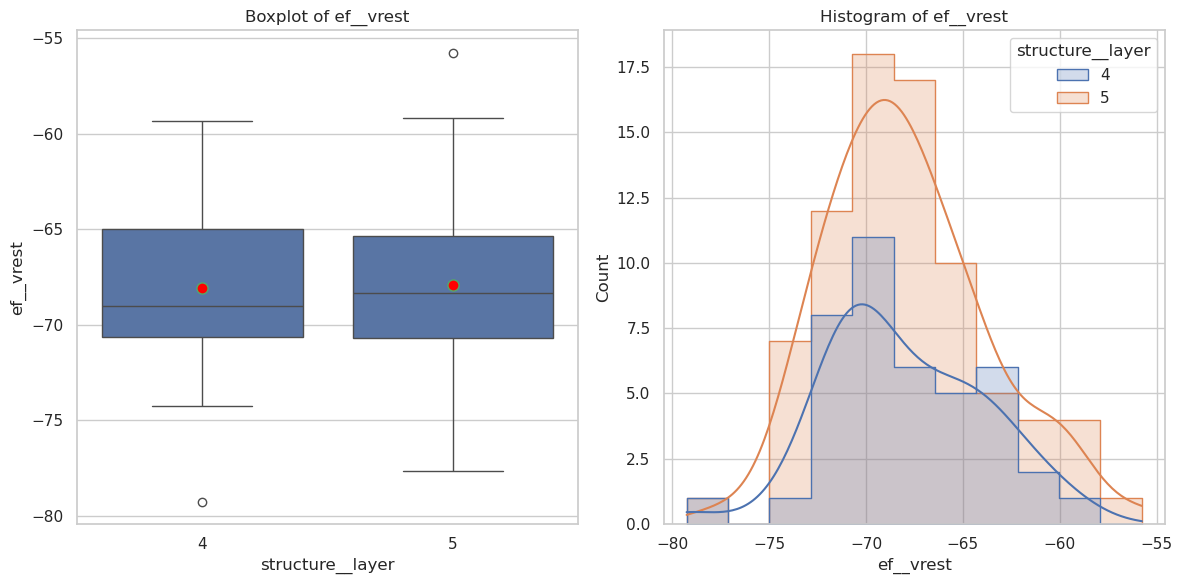

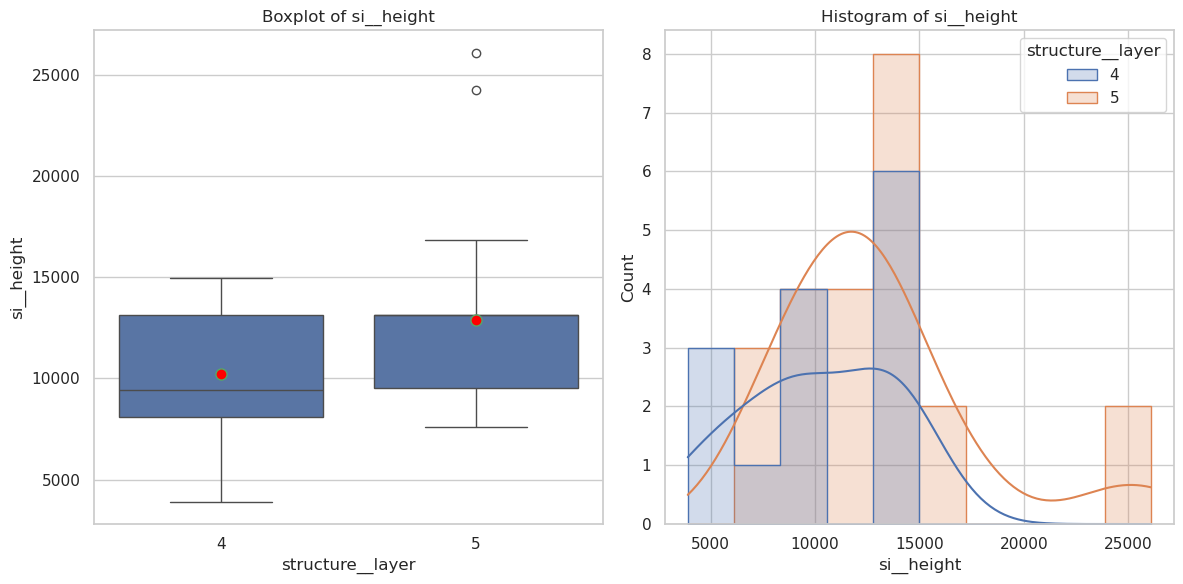

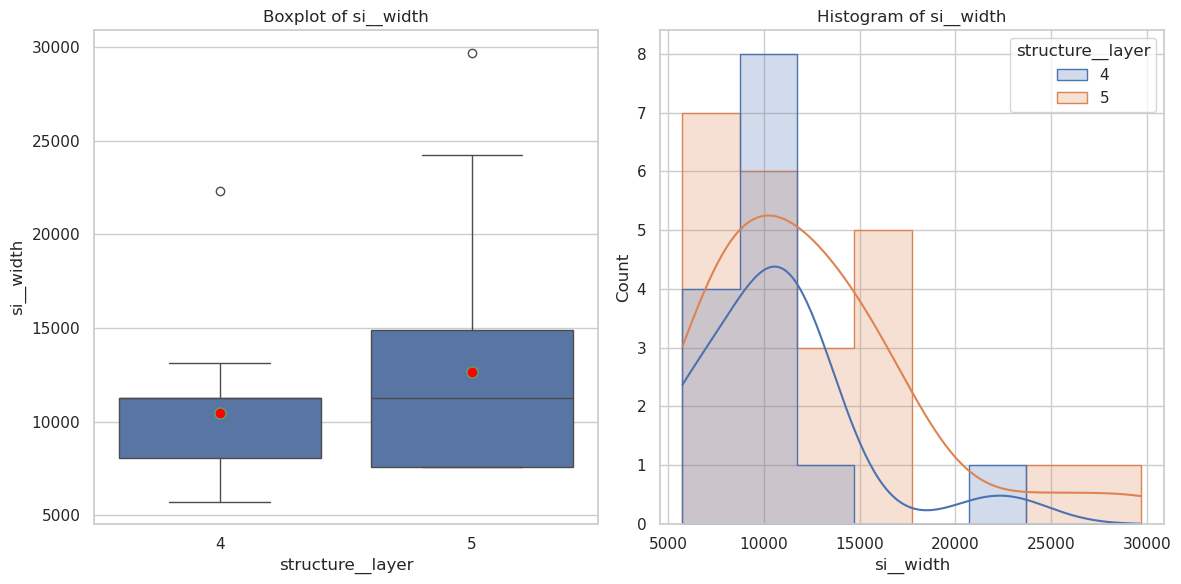

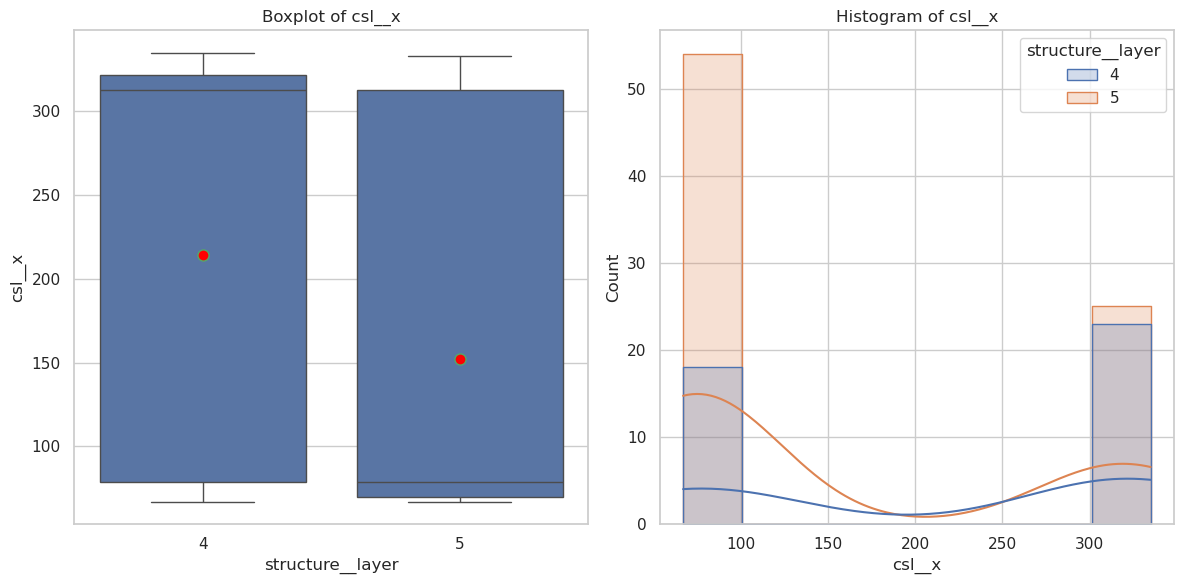

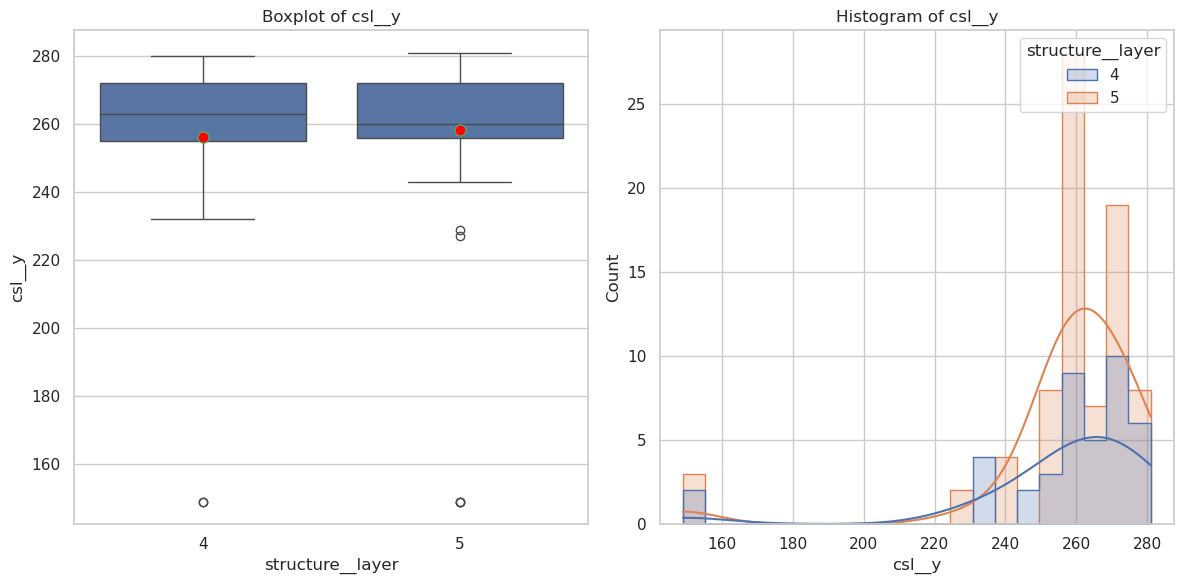

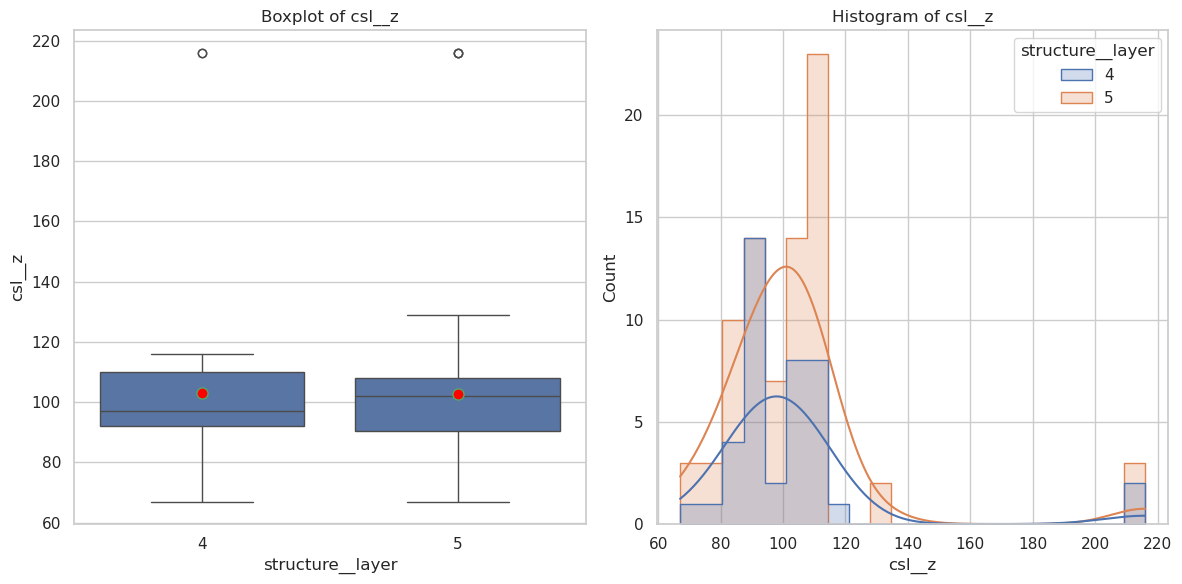

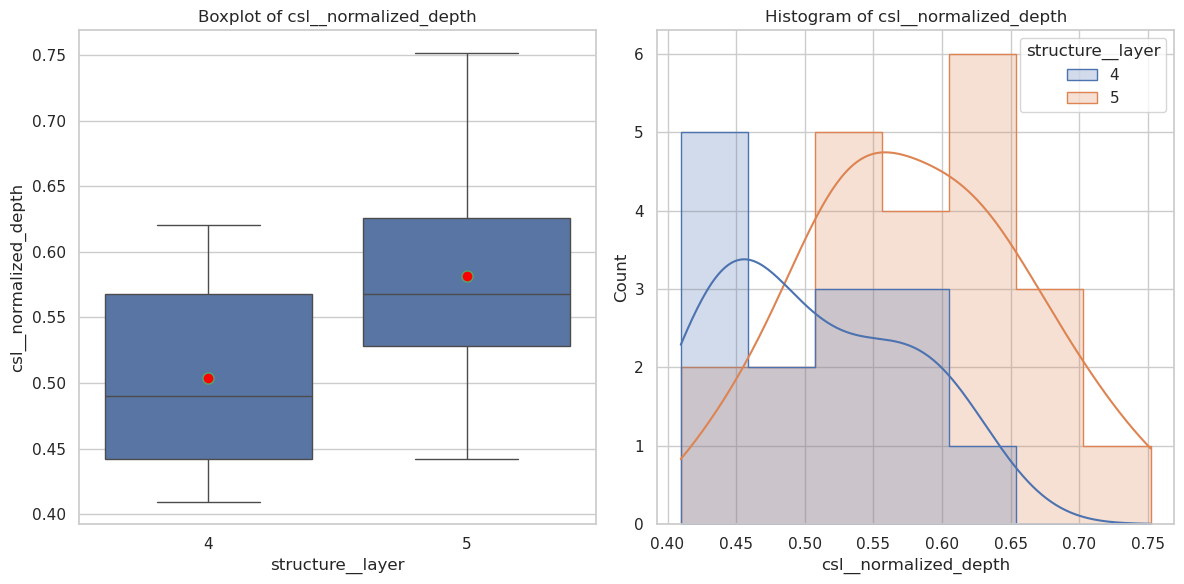

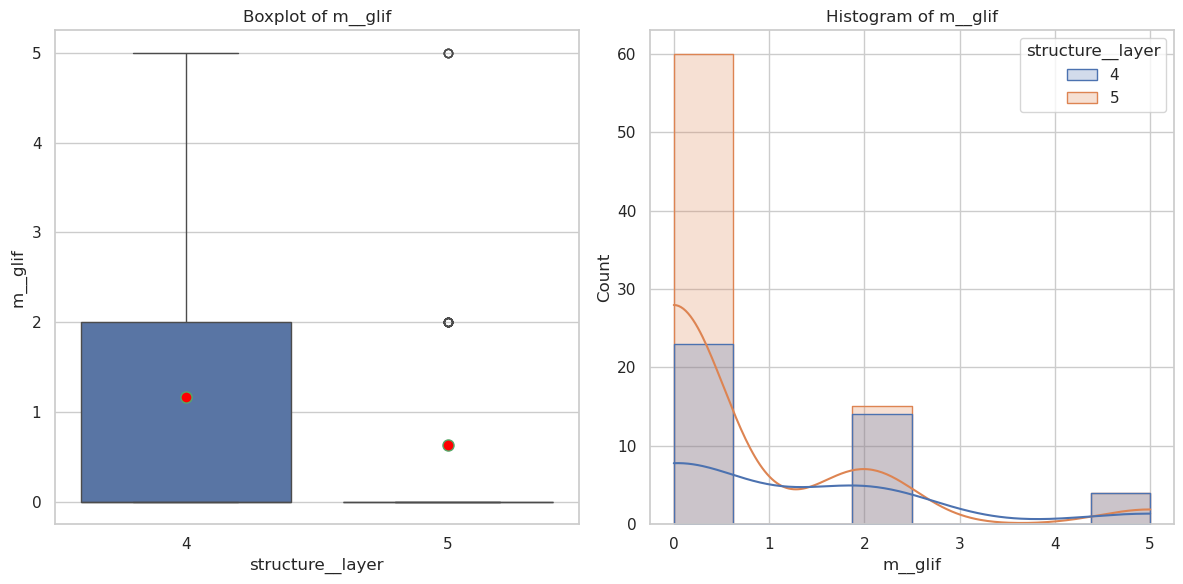

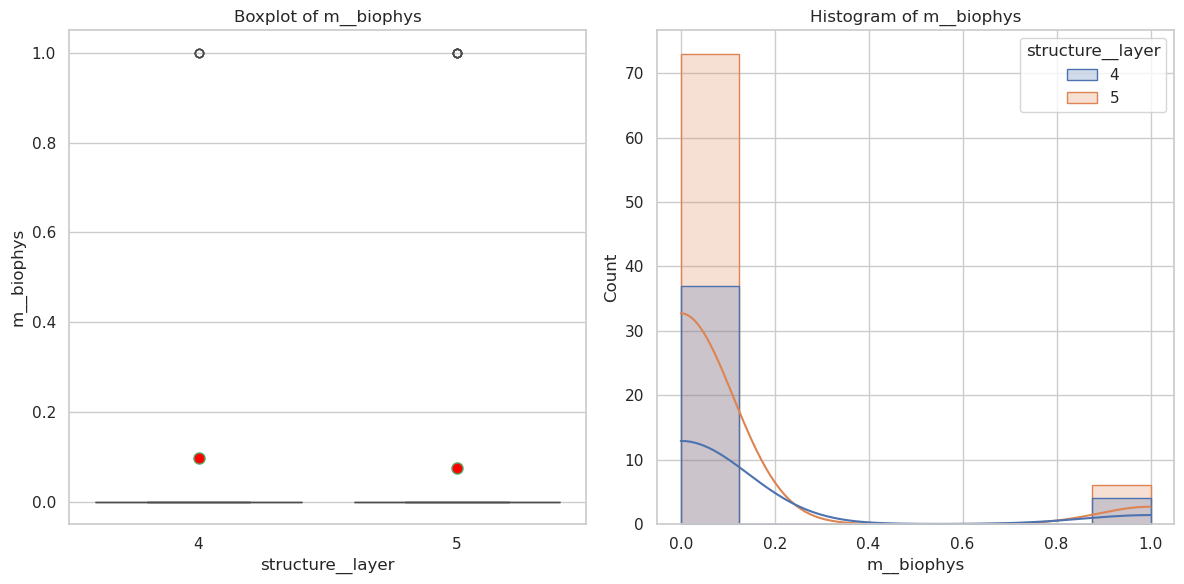

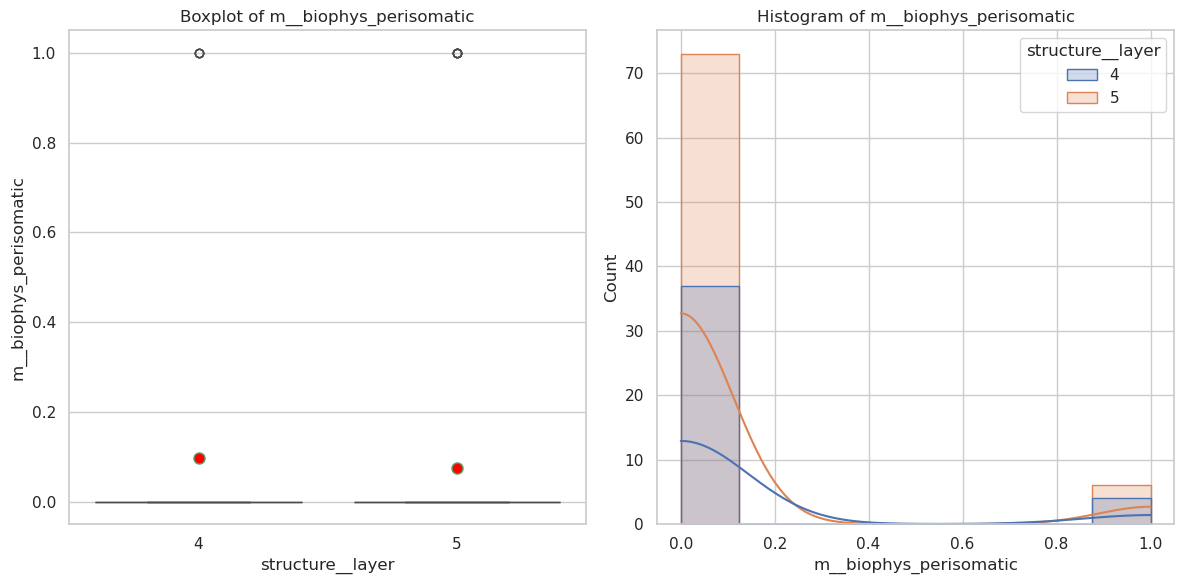

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

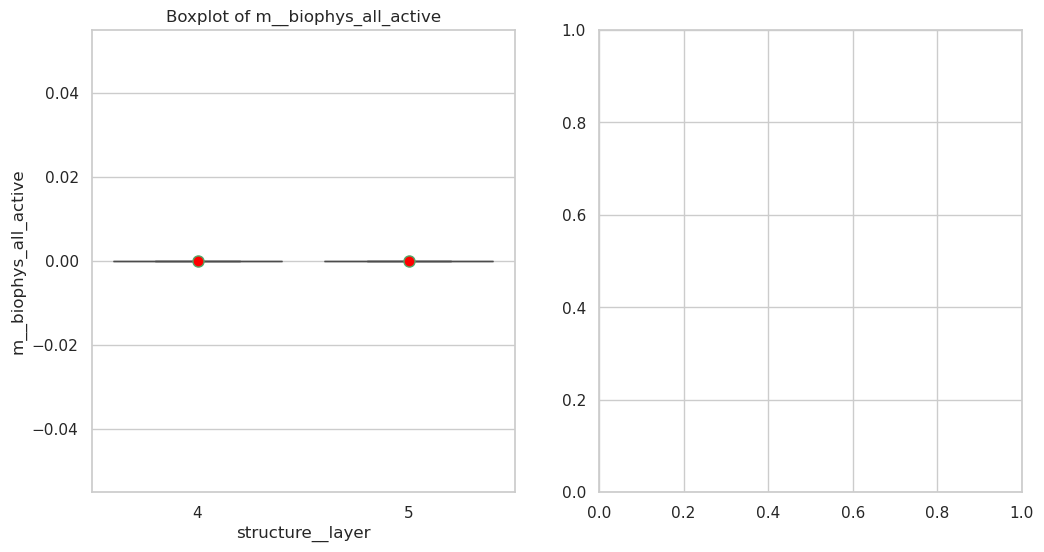

In [45]:


# Set up the plot style
sns.set(style="whitegrid")
df_combined=pd.concat([epihumanL4_df,epihumanL5_df],ignore_index=True)

# Plotting boxplots and histograms
for col in columns_to_compare:
    if col in df_combined.columns:
        plt.figure(figsize=(12, 6))

        # Boxplot with mean and standard deviation
        plt.subplot(1, 2, 1)
        sns.boxplot(x='structure__layer', y=col, data=df_combined, showmeans=True,
                    meanprops={"marker":"o", "markerfacecolor":"red", "markersize":"8"})
        plt.title(f'Boxplot of {col}')

        # Histogram
        plt.subplot(1, 2, 2)
        sns.histplot(data=df_combined, x=col, hue='structure__layer', kde=True, element='step')
        plt.title(f'Histogram of {col}')

        plt.tight_layout()
        plt.show()